In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

In [2]:
 
df = pd.read_csv('data.csv')
df.head()

,Timestamp,Gender,Age Group,Education,Place of residence,Income source,I would suffer economic crises during lockdown.,Living with parents,Relative or acquaintance infected with COVID-19,FCV-19S [I am most afraid of coronavirus-19.],FCV-19S [It makes me uncomfortable to think about coronavirus-19.],FCV-19S [My hands become clammy when I think about coronavirus-19.],FCV-19S [I am afraid of losing my life because of coronavirus-19.],"FCV-19S [When watching news and stories about coronavirus-19 on social media, I become nervous or anxious.]",FCV-19S [I cannot sleep because I’m worrying about getting coronavirus-19.],FCV-19S [My heart races or palpitates when I think about getting coronavirus-19.]
0,11/17/2020 15:33:19,Male,25-34,Bachelors,Rural-urban,Job (Monthly Income),Maybe,Yes,Yes,Neutral,Agree,Agree,Neutral,Strongly Agree,Neutral,Neutral
1,11/21/2020 9:06:48,Female,25-34,Masters,Urban,Job (Monthly Income),Yes,Yes,Yes,Neutral,Agree,Neutral,Neutral,Neutral,Neutral,Neutral
2,11/21/2020 13:40:44,Male,18-24,Bachelors,Urban,Job (Monthly Income),No,Yes,Yes,Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree
3,11/21/2020 13:51:53,Male,18-24,Inter,Urban,Small Business,Yes,Yes,No,Strongly Agree,Agree,Neutral,Strongly Agree,Agree,Agree,Neutral
4,11/21/2020 14:01:33,Male,25-34,Bachelors,Urban,Job (Monthly Income),Maybe,Yes,No,Neutral,Neutral,Disagree,Agree,Agree,Strongly Disagree,Strongly Disagree


In [3]:
pd.unique(df['Income source'])

array(['Job (Monthly Income)', 'Small Business',
       'Medium to Large Business', 'Daily basis work', "I don't work",
       'Student', 'No job live with parents ', 'Jobless', 'None',
       'Job (Monthly Income), Small Business',
       'Daily basis work, Small Business', 'Freelancing ', 'NONE',
       'Freelance', 'none.', 'Not working yet', 'student', 'Studenr',
       'Part time job', 'House wife', 'Daily basis work, Freelance',
       'House wife ', 'Housewife', 'Family business',
       'I have two small businesses along with a part time project with USA based company.',
       'Unemployed ', 'Freelance work', 'Looking for job', 'Not yet ',
       'Freelance writing, management internship, parents',
       'I am student', 'Agriculture ', 'Student ', 'Mill', 'No income',
       'Pension', 'Farmer '], dtype=object)

In [4]:
df['Income source'][df['Income source']=='House wife '] = 'Housewife'
df['Income source'][df['Income source']=='House wife'] = 'Housewife'
df['Income source'][df['Income source']=='House wife'] = 'Housewife'
df['Income source'][df['Income source']=='House wife'] = 'Housewife'

df['Income source'][df['Income source']=='Student'] = 'Student'
df['Income source'][df['Income source']=='student'] = 'Student'
df['Income source'][df['Income source']=='Studenr'] = 'Student'
df['Income source'][df['Income source']=='I am student'] = 'Student'
df['Income source'][df['Income source']=='Student '] = 'Student'

df['Income source'][df['Income source']=='Freelance'] = 'Freelancing'
df['Income source'][df['Income source']=='Freelancing '] = 'Freelancing'
df['Income source'][df['Income source']=='Freelance work'] = 'Freelancing'
df['Income source'][df['Income source']=='Freelance writing, management internship, parents'] = 'Freelancing'


df['Income source'][df['Income source']=="I don't work"] = 'None'
df['Income source'][df['Income source']=="No job live with parents "] = 'None'
df['Income source'][df['Income source']=="Jobless"] = 'None'
df['Income source'][df['Income source']=="None"] = 'None'
df['Income source'][df['Income source']=="NONE"] = 'None'
df['Income source'][df['Income source']=="none"] = 'None'
df['Income source'][df['Income source']=="Not working yet"] = 'None'
df['Income source'][df['Income source']=="Unemployed "] = 'None'
df['Income source'][df['Income source']=="Looking for job "] = 'None'
df['Income source'][df['Income source']=="Not yet  "] = 'None'
df['Income source'][df['Income source']=="No income "] = 'None'
df['Income source'][df['Income source']=="none."] = 'None'
df['Income source'][df['Income source']=="Not yet "] = 'None'
df['Income source'][df['Income source']=="No income"] = 'None'
df['Income source'][df['Income source']=="Looking for job"] = 'None'


df['Income source'][df['Income source']=="Job (Monthly Income), Small Business"] = 'Small Business'
df['Income source'][df['Income source']=="Daily basis work, Small Business"] = 'Small Business'
df['Income source'][df['Income source']=="Family business"] = 'Small Business'
df['Income source'][df['Income source']=="I have two small businesses along with a part time project with USA based company."] = 'Small Business'
df['Income source'][df['Income source']=="Agriculture "] = 'Small Business'

df['Income source'][df['Income source']=="Mill"] = 'Medium to Large Business'


df['Income source'][df['Income source']=="Daily basis work, Freelance"] = 'Daily basis work'
df['Income source'][df['Income source']=="Farmer "] = 'Daily basis work'

df['Income source'][df['Income source']=="Part time job"] = 'Job (Monthly Income)'
df['Income source'][df['Income source']=="Pension"] = 'Job (Monthly Income)'


In [5]:
pd.unique(df['Income source'])

array(['Job (Monthly Income)', 'Small Business',
       'Medium to Large Business', 'Daily basis work', 'None', 'Student',
       'Freelancing', 'Housewife'], dtype=object)

In [6]:
df.head()

,Timestamp,Gender,Age Group,Education,Place of residence,Income source,I would suffer economic crises during lockdown.,Living with parents,Relative or acquaintance infected with COVID-19,FCV-19S [I am most afraid of coronavirus-19.],FCV-19S [It makes me uncomfortable to think about coronavirus-19.],FCV-19S [My hands become clammy when I think about coronavirus-19.],FCV-19S [I am afraid of losing my life because of coronavirus-19.],"FCV-19S [When watching news and stories about coronavirus-19 on social media, I become nervous or anxious.]",FCV-19S [I cannot sleep because I’m worrying about getting coronavirus-19.],FCV-19S [My heart races or palpitates when I think about getting coronavirus-19.]
0,11/17/2020 15:33:19,Male,25-34,Bachelors,Rural-urban,Job (Monthly Income),Maybe,Yes,Yes,Neutral,Agree,Agree,Neutral,Strongly Agree,Neutral,Neutral
1,11/21/2020 9:06:48,Female,25-34,Masters,Urban,Job (Monthly Income),Yes,Yes,Yes,Neutral,Agree,Neutral,Neutral,Neutral,Neutral,Neutral
2,11/21/2020 13:40:44,Male,18-24,Bachelors,Urban,Job (Monthly Income),No,Yes,Yes,Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree
3,11/21/2020 13:51:53,Male,18-24,Inter,Urban,Small Business,Yes,Yes,No,Strongly Agree,Agree,Neutral,Strongly Agree,Agree,Agree,Neutral
4,11/21/2020 14:01:33,Male,25-34,Bachelors,Urban,Job (Monthly Income),Maybe,Yes,No,Neutral,Neutral,Disagree,Agree,Agree,Strongly Disagree,Strongly Disagree


In [7]:
df.isnull().sum()

Timestamp                                                                                                      0
Gender                                                                                                         0
Age Group                                                                                                      0
Education                                                                                                      0
Place of residence                                                                                             0
Income source                                                                                                  0
I would suffer economic crises during lockdown.                                                                0
Living with parents                                                                                            0
Relative or acquaintance infected with COVID-19                                                 

In [8]:
pd.unique(df['FCV-19S [I am most afraid of coronavirus-19.]'])

array(['Neutral', 'Disagree', 'Strongly Agree', 'Agree',
       'Strongly Disagree'], dtype=object)

In [9]:
mapper = {'Strongly Disagree': 1, 'Disagree': 2, 'Neutral': 3, 'Agree': 4, 'Strongly Agree': 5}

df['fcv_1'] = df['FCV-19S [I am most afraid of coronavirus-19.]']
df['fcv_2'] = df['FCV-19S [It makes me uncomfortable to think about coronavirus-19.]']
df['fcv_3'] = df['FCV-19S [My hands become clammy when I think about coronavirus-19.]']
df['fcv_4'] = df['FCV-19S [I am afraid of losing my life because of coronavirus-19.]']
df['fcv_5'] = df['FCV-19S [When watching news and stories about coronavirus-19 on social media, I become nervous or anxious.]']
df['fcv_6'] = df['FCV-19S [I cannot sleep because I’m worrying about getting coronavirus-19.]']
df['fcv_7'] = df['FCV-19S [My heart races or palpitates when I think about getting coronavirus-19.]']

df.fcv_1 = df.fcv_1.map(mapper)
df.fcv_2 = df.fcv_2.map(mapper)
df.fcv_3 = df.fcv_3.map(mapper)
df.fcv_4 = df.fcv_4.map(mapper)
df.fcv_5 = df.fcv_5.map(mapper)
df.fcv_6 = df.fcv_6.map(mapper)
df.fcv_7 = df.fcv_7.map(mapper)

df['fear_score'] = df.fcv_1+df.fcv_2+df.fcv_3+df.fcv_4+df.fcv_5+df.fcv_6+df.fcv_7

df.head()

,Timestamp,Gender,Age Group,Education,Place of residence,Income source,I would suffer economic crises during lockdown.,Living with parents,Relative or acquaintance infected with COVID-19,FCV-19S [I am most afraid of coronavirus-19.],...,FCV-19S [I cannot sleep because I’m worrying about getting coronavirus-19.],FCV-19S [My heart races or palpitates when I think about getting coronavirus-19.],fcv_1,fcv_2,fcv_3,fcv_4,fcv_5,fcv_6,fcv_7,fear_score
0,11/17/2020 15:33:19,Male,25-34,Bachelors,Rural-urban,Job (Monthly Income),Maybe,Yes,Yes,Neutral,...,Neutral,Neutral,3,4,4,3,5,3,3,25
1,11/21/2020 9:06:48,Female,25-34,Masters,Urban,Job (Monthly Income),Yes,Yes,Yes,Neutral,...,Neutral,Neutral,3,4,3,3,3,3,3,22
2,11/21/2020 13:40:44,Male,18-24,Bachelors,Urban,Job (Monthly Income),No,Yes,Yes,Disagree,...,Strongly Disagree,Strongly Disagree,2,1,1,1,1,1,1,8
3,11/21/2020 13:51:53,Male,18-24,Inter,Urban,Small Business,Yes,Yes,No,Strongly Agree,...,Agree,Neutral,5,4,3,5,4,4,3,28
4,11/21/2020 14:01:33,Male,25-34,Bachelors,Urban,Job (Monthly Income),Maybe,Yes,No,Neutral,...,Strongly Disagree,Strongly Disagree,3,3,2,4,4,1,1,18


In [10]:
df.to_csv('fear_score.csv')

In [11]:
def chi2_grid(fcv_n='', col_name='Gender'):
    cols = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']
    rows = pd.unique(df[col_name])
    col_fcv = pd.DataFrame( np.zeros((len(rows), len(cols))) , columns=cols, index=rows)
    for col in cols:
        for row in rows:
            col_fcv[col][row] = df[(df[fcv_n]==col) & (df[col_name]==row)].shape[0]

    
    return col_fcv

def chi2_test(fcv, col_name='Gender'):
    
    cols = ['chi2', 'p_value', 'dof']
    results = pd.DataFrame(np.zeros((len(fcv), len(cols))), columns=cols, index=fcv)
    for fcv_n in fcv:
        col_fcv = chi2_grid(fcv_n, col_name)
        chi2, p, dof, exp = chi2_contingency(col_fcv)
        results['chi2'][fcv_n] = chi2
        results['p_value'][fcv_n] = p
        results['dof'][fcv_n] = dof
        
    
    return results
    

fcv = [ 'FCV-19S [I am most afraid of coronavirus-19.]', 
            'FCV-19S [It makes me uncomfortable to think about coronavirus-19.]', 
            'FCV-19S [My hands become clammy when I think about coronavirus-19.]', 
            'FCV-19S [I am afraid of losing my life because of coronavirus-19.]', 
            'FCV-19S [When watching news and stories about coronavirus-19 on social media, I become nervous or anxious.]', 
            'FCV-19S [I cannot sleep because I’m worrying about getting coronavirus-19.]', 
            'FCV-19S [My heart races or palpitates when I think about getting coronavirus-19.]']

In [28]:
chi2_test(fcv, 'Age Group')

,chi2,p_value,dof
FCV-19S [I am most afraid of coronavirus-19.],18.393756,0.561487,20.0
FCV-19S [It makes me uncomfortable to think about coronavirus-19.],17.056112,0.649327,20.0
FCV-19S [My hands become clammy when I think about coronavirus-19.],27.859882,0.112758,20.0
FCV-19S [I am afraid of losing my life because of coronavirus-19.],30.961471,0.055701,20.0
"FCV-19S [When watching news and stories about coronavirus-19 on social media, I become nervous or anxious.]",29.978652,0.070200,20.0
FCV-19S [I cannot sleep because I’m worrying about getting coronavirus-19.],30.652953,0.059942,20.0
FCV-19S [My heart races or palpitates when I think about getting coronavirus-19.],21.509583,0.367703,20.0


In [31]:
chi2_test(fcv, 'Education')

,chi2,p_value,dof
FCV-19S [I am most afraid of coronavirus-19.],15.730461,0.733199,20.0
FCV-19S [It makes me uncomfortable to think about coronavirus-19.],17.431731,0.624788,20.0
FCV-19S [My hands become clammy when I think about coronavirus-19.],13.336204,0.862498,20.0
FCV-19S [I am afraid of losing my life because of coronavirus-19.],23.025251,0.287556,20.0
"FCV-19S [When watching news and stories about coronavirus-19 on social media, I become nervous or anxious.]",16.501452,0.685068,20.0
FCV-19S [I cannot sleep because I’m worrying about getting coronavirus-19.],24.010109,0.241951,20.0
FCV-19S [My heart races or palpitates when I think about getting coronavirus-19.],22.504068,0.313796,20.0


In [32]:
chi2_test(fcv, 'Gender')

,chi2,p_value,dof
FCV-19S [I am most afraid of coronavirus-19.],7.688743,0.464450,8.0
FCV-19S [It makes me uncomfortable to think about coronavirus-19.],12.034712,0.149662,8.0
FCV-19S [My hands become clammy when I think about coronavirus-19.],10.108255,0.257510,8.0
FCV-19S [I am afraid of losing my life because of coronavirus-19.],28.497472,0.000388,8.0
"FCV-19S [When watching news and stories about coronavirus-19 on social media, I become nervous or anxious.]",19.095314,0.014358,8.0
FCV-19S [I cannot sleep because I’m worrying about getting coronavirus-19.],12.495476,0.130428,8.0
FCV-19S [My heart races or palpitates when I think about getting coronavirus-19.],14.287191,0.074580,8.0


In [35]:
chi2_test(fcv, 'Place of residence')

,chi2,p_value,dof
FCV-19S [I am most afraid of coronavirus-19.],6.213623,0.623317,8.0
FCV-19S [It makes me uncomfortable to think about coronavirus-19.],16.243786,0.039021,8.0
FCV-19S [My hands become clammy when I think about coronavirus-19.],18.017606,0.021095,8.0
FCV-19S [I am afraid of losing my life because of coronavirus-19.],4.756403,0.783267,8.0
"FCV-19S [When watching news and stories about coronavirus-19 on social media, I become nervous or anxious.]",16.747220,0.032852,8.0
FCV-19S [I cannot sleep because I’m worrying about getting coronavirus-19.],12.745229,0.120921,8.0
FCV-19S [My heart races or palpitates when I think about getting coronavirus-19.],15.176256,0.055808,8.0


In [36]:
chi2_test(fcv, 'Income source')

,chi2,p_value,dof
FCV-19S [I am most afraid of coronavirus-19.],35.854616,0.146337,28.0
FCV-19S [It makes me uncomfortable to think about coronavirus-19.],27.824454,0.473779,28.0
FCV-19S [My hands become clammy when I think about coronavirus-19.],41.812546,0.045154,28.0
FCV-19S [I am afraid of losing my life because of coronavirus-19.],33.956259,0.202317,28.0
"FCV-19S [When watching news and stories about coronavirus-19 on social media, I become nervous or anxious.]",55.579697,0.001447,28.0
FCV-19S [I cannot sleep because I’m worrying about getting coronavirus-19.],34.799855,0.175769,28.0
FCV-19S [My heart races or palpitates when I think about getting coronavirus-19.],37.159504,0.115384,28.0


In [19]:
chi2_test(fcv, 'Place of residence').describe()

,chi2,p_value,dof
count,7.000000,7.000000,7.0
mean,12.842875,0.239468,8.0
std,5.297486,0.321817,0.0
min,4.756403,0.021095,8.0
25%,9.479426,0.035936,8.0
50%,15.176256,0.055808,8.0
75%,16.495503,0.372119,8.0
max,18.017606,0.783267,8.0


In [172]:
print(fcv[0])
chi2_grid(fcv[0], 'Income source')

FCV-19S [I am most afraid of coronavirus-19.]


,Strongly Disagree,Disagree,Neutral,Agree,Strongly Agree
Job (Monthly Income),11.0,12.0,52.0,49.0,21.0
Small Business,0.0,3.0,15.0,5.0,6.0
Medium to Large Business,3.0,5.0,8.0,5.0,5.0
Daily basis work,1.0,2.0,10.0,5.0,1.0
None,0.0,0.0,6.0,6.0,2.0
Student,0.0,0.0,2.0,8.0,3.0
Freelancing,1.0,0.0,3.0,0.0,0.0
Housewife,0.0,0.0,4.0,4.0,0.0


In [175]:
chi2.ppf(0.95, 20)

31.410432844230918

In [17]:
df.describe()

,fcv_1,fcv_2,fcv_3,fcv_4,fcv_5,fcv_6,fcv_7,fear_score
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,3.403101,3.418605,2.585271,2.965116,3.279070,2.251938,2.461240,20.364341
std,1.040199,1.178257,1.184570,1.291526,1.186675,1.067059,1.200053,6.489666
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
25%,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.250000,16.000000
50%,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,2.000000,21.000000
75%,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,25.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,35.000000


In [12]:


def get_p_values(vars1, vars2):

    p_value_table = pd.DataFrame(np.zeros((len(vars2), len(vars1))), columns=vars1, index=vars2)
    for var1 in vars1:
        for var2 in vars2:

            cols = pd.unique(df[var1])
            rows = pd.unique(df[var2])
            col_fcv = pd.DataFrame( np.zeros((len(rows), len(cols))) , columns=cols, index=rows)
            for col in cols:
                for row in rows:
                    col_fcv[col][row] = df[(df[var1]==col) & (df[var2]==row)].shape[0]


            chi2, p, dof, exp = chi2_contingency(col_fcv)
            p_value_table[var1][var2] = p

    return p_value_table

In [13]:

vars1 = [
    'Gender', 
    'Age Group', 
    'Education', 
    'Income source', 
    'Place of residence', 
    'I would suffer economic crises during lockdown.', 
    'Living with parents',
    'Relative or acquaintance infected with COVID-19'
]
vars2 = [
     'FCV-19S [I am most afraid of coronavirus-19.]',
    'FCV-19S [It makes me uncomfortable to think about coronavirus-19.]',
    'FCV-19S [My hands become clammy when I think about coronavirus-19.]',
    'FCV-19S [I am afraid of losing my life because of coronavirus-19.]',
    'FCV-19S [When watching news and stories about coronavirus-19 on social media, I become nervous or anxious.]',
    'FCV-19S [I cannot sleep because I’m worrying about getting coronavirus-19.]',
    'FCV-19S [My heart races or palpitates when I think about getting coronavirus-19.]'
]


In [14]:
p_value_table = get_p_values(vars1, vars1)
p_value_table[p_value_table<0.05]

,Gender,Age Group,Education,Income source,Place of residence,I would suffer economic crises during lockdown.,Living with parents,Relative or acquaintance infected with COVID-19
Gender,2.319121e-110,2.988876e-02,4.779224e-02,0.018075,NaN,NaN,NaN,4.681922e-02
Age Group,2.988876e-02,1.152319e-256,1.341598e-07,0.000005,NaN,NaN,1.528143e-13,NaN
Education,4.779224e-02,1.341598e-07,1.152319e-256,0.000486,NaN,NaN,1.435401e-02,NaN
Income source,1.807496e-02,4.873565e-06,4.863686e-04,0.000000,NaN,NaN,2.917744e-02,1.666968e-02
Place of residence,NaN,NaN,NaN,NaN,2.319121e-110,NaN,NaN,3.186417e-02
I would suffer economic crises during lockdown.,NaN,NaN,NaN,NaN,NaN,2.319121e-110,NaN,4.536421e-02
Living with parents,NaN,1.528143e-13,1.435401e-02,0.029177,NaN,NaN,7.935231e-57,NaN
Relative or acquaintance infected with COVID-19,4.681922e-02,NaN,NaN,0.016670,3.186417e-02,4.536421e-02,NaN,3.569179e-57


In [15]:
p_value_table = get_p_values(vars1, vars2)
p_value_table[p_value_table<0.05]

,Gender,Age Group,Education,Income source,Place of residence,I would suffer economic crises during lockdown.,Living with parents,Relative or acquaintance infected with COVID-19
FCV-19S [I am most afraid of coronavirus-19.],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FCV-19S [It makes me uncomfortable to think about coronavirus-19.],NaN,NaN,NaN,NaN,0.039021,NaN,NaN,NaN
FCV-19S [My hands become clammy when I think about coronavirus-19.],NaN,NaN,NaN,0.045154,0.021095,0.010569,0.038727,NaN
FCV-19S [I am afraid of losing my life because of coronavirus-19.],0.000388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"FCV-19S [When watching news and stories about coronavirus-19 on social media, I become nervous or anxious.]",0.014358,NaN,NaN,0.001447,0.032852,NaN,NaN,NaN
FCV-19S [I cannot sleep because I’m worrying about getting coronavirus-19.],NaN,NaN,NaN,NaN,NaN,0.006341,NaN,NaN
FCV-19S [My heart races or palpitates when I think about getting coronavirus-19.],NaN,NaN,NaN,NaN,NaN,0.000082,NaN,NaN


In [16]:
p_value_table = get_p_values(vars2, vars2)
p_value_table[p_value_table<0.05]

,FCV-19S [I am most afraid of coronavirus-19.],FCV-19S [It makes me uncomfortable to think about coronavirus-19.],FCV-19S [My hands become clammy when I think about coronavirus-19.],FCV-19S [I am afraid of losing my life because of coronavirus-19.],"FCV-19S [When watching news and stories about coronavirus-19 on social media, I become nervous or anxious.]",FCV-19S [I cannot sleep because I’m worrying about getting coronavirus-19.],FCV-19S [My heart races or palpitates when I think about getting coronavirus-19.]
FCV-19S [I am most afraid of coronavirus-19.],1.570670e-209,1.069238e-31,1.929746e-19,6.025858e-24,1.747158e-21,6.933456e-16,1.085972e-10
FCV-19S [It makes me uncomfortable to think about coronavirus-19.],1.069238e-31,1.570670e-209,6.813881e-34,3.377851e-19,1.546068e-31,3.548896e-16,5.475995e-15
FCV-19S [My hands become clammy when I think about coronavirus-19.],1.929746e-19,6.813881e-34,1.570670e-209,5.312215e-33,1.592304e-29,4.905018e-36,2.701063e-31
FCV-19S [I am afraid of losing my life because of coronavirus-19.],6.025858e-24,3.377851e-19,5.312215e-33,1.570670e-209,2.918024e-29,2.816439e-19,1.811592e-27
"FCV-19S [When watching news and stories about coronavirus-19 on social media, I become nervous or anxious.]",1.747158e-21,1.546068e-31,1.592304e-29,2.918024e-29,1.570670e-209,3.767767e-27,2.988648e-24
FCV-19S [I cannot sleep because I’m worrying about getting coronavirus-19.],6.933456e-16,3.548896e-16,4.905018e-36,2.816439e-19,3.767767e-27,1.570670e-209,6.168485e-69
FCV-19S [My heart races or palpitates when I think about getting coronavirus-19.],1.085972e-10,5.475995e-15,2.701063e-31,1.811592e-27,2.988648e-24,6.168485e-69,1.570670e-209


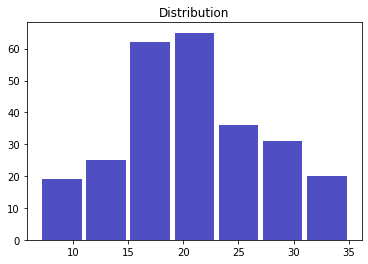

In [17]:

plt.hist(x=df.fear_score, bins=7, color='#0504aa',
                            alpha=0.7, rwidth=0.9)
plt.title('Distribution')
plt.show()

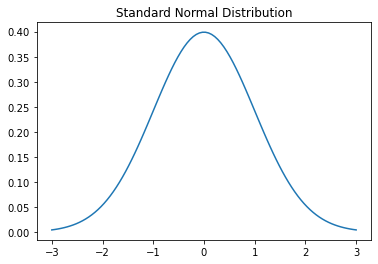

In [18]:

x = np.linspace(-3, 3, 100)
pdf = norm.pdf(x, 0, 1)
plt.plot(x, pdf)
plt.title('Standard Normal Distribution')
plt.show()

In [19]:
d = df.fear_score
d = (d-d.mean())/d.std()
d.mean(), d.std()

(1.1548686210611487e-16, 0.9999999999999999)

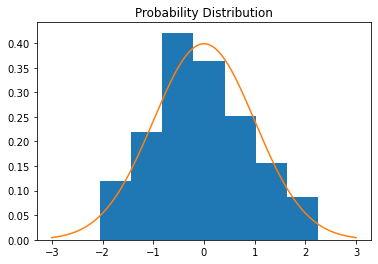

In [21]:



# Fit a normal distribution to the data:
mu, std = d.mean(), d.std()

# Plot the histogram.
plt.hist(d, bins=7, density=True)

# Plot the PDF.
xmin, xmax = mu-3*std, mu+3*std
x = np.linspace(xmin, xmax, d.count())
p = norm.pdf(x, mu, std)
plt.plot(x, p)
title = "Probability Distribution"
plt.title(title)

plt.show()


In [23]:
mse = np.sqrt(np.sum(np.square(p-d)))
mse

16.419327395301412

In [10]:
df.fear_score.describe()

count    258.000000
mean      20.364341
std        6.489666
min        7.000000
25%       16.000000
50%       21.000000
75%       25.000000
max       35.000000
Name: fear_score, dtype: float64